### TASK 1:  IMPORTING ALL THE NECESSARY LIBRARIES AND READING THE CSV FILE

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
###### 1. READ CSV FILE  ######

In [1]:
import csv

# Specify the path to your CSV file
csv_file_path = 'C:\\Users/DELL/Desktop/ACW data assignment_files/acw_user_data.csv'

# Create an empty list to store the data
dataset = []

# Read the CSV file
with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Skip the header row if it exists
    header = next(csv_reader, None)
    
    # Read the data row by row
    for row in csv_reader:
        dataset.append(row)

# Print the first few rows of data
for i in range(min(5, len(dataset))):
    print(dataset[i])


['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1GH', '22', '16.02', 'Hill-Wright', '11/19', '07/27', '4091726363083888495', '422', '1', 'Antony', 'GB40CVUE84011545859591', 'Jones', 'married or civil partner', '0', 'False', '68049', 'Male', 'GMC', 'Achieva', '2015', 'Convertible, Coupe']
['Studio 46S Bethany lights', 'East Reece', 'E10 9RJ', '56', '19.35', 'Green LLC', '10/17', '04/18', '4671332769487632633', '669', '2', 'Henry', 'GB40YPKK71613332239280', 'Shaw', 'marr

## TASK 2: converting flat structures to nested structures

using the following mapping
a. Vehicle - make, model, year, and type
b. Credit Card - start date, end date, number, security code, and IBAN
c. Address - main address, city, and postcode.

In [4]:
# Assuming 'your_dataset.csv' is your CSV file name
csv_file_path = 'C:\\Users/DELL/Desktop/ACW data assignment_files/acw_user_data.csv'

# Create an empty list to store the modified rows
modified_dataset = []

# Read the CSV file
with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        # Create a dictionary for the 'vehicle' information
        vehicle = {
            'make': row.get('Vehicle Make', ''),
            'model': row.get('Vehicle Model', ''),
            'year': int(row.get('Vehicle Year', 0)),  # Default to 0 if not convertible to int
            'type': row.get('Vehicle Type', '')
        }

        # Create a dictionary for the 'credit_card' information
        credit_card = {
            'start_date': row.get('Credit Card Start Date', ''),
            'end_date': row.get('Credit Card Expiry Date', ''),
            'number': str(row.get('Credit Card Number', '')),  # Convert to string
            'security_code': row.get('Credit Card CVV', ''),
            'IBAN': row.get('Bank IBAN', '')
        }

        # Create a dictionary for the 'address' information
        address = {
            'main_address': row.get('Address Street', ''),
            'city': row.get('Address City', ''),
            'postcode': row.get('Address Postcode', '')
        }

        # Remove unnecessary columns
        for col in ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type',
                    'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number',
                    'Credit Card CVV', 'Bank IBAN', 'Address Street', 'Address City', 'Address Postcode']:
            row.pop(col, None)

        # Add the nested dictionaries to the row
        row['vehicle'] = vehicle
        row['credit_card'] = credit_card
        row['address'] = address

        # Append the modified row to the list
        modified_dataset.append(row)

# Print the modified dataset
for modified_row in modified_dataset:
    print(modified_row)


{'Age (Years)': '89', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Dependants': '3', 'First Name': 'Kieran', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': 2009, 'type': 'Pickup'}, 'credit_card': {'start_date': '08/18', 'end_date': '11/27', 'number': '676373692463', 'security_code': '875', 'IBAN': 'GB62PQKB71416034141571'}, 'address': {'main_address': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}
{'Age (Years)': '46', 'Distance Commuted to Work (Km)': '13.72', 'Employer Company': 'Begum-Williams', 'Dependants': '1', 'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '54016', 'Sex': 'Male', 'vehicle': {'make': 'Nissan', 'model': 'ATS', 'year': 1996, 'type'

{'Age (Years)': '62', 'Distance Commuted to Work (Km)': '12.14', 'Employer Company': 'Carr-Dixon', 'Dependants': '3', 'First Name': 'Jessica', 'Last Name': 'Sims', 'Marital Status': 'widowed', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '45240', 'Sex': 'Female', 'vehicle': {'make': 'Acura', 'model': 'Acadia', 'year': 2005, 'type': 'Pickup'}, 'credit_card': {'start_date': '01/16', 'end_date': '09/21', 'number': '3528590602376037', 'security_code': '960', 'IBAN': 'GB44CIPR65952794910121'}, 'address': {'main_address': '4 Sarah pass', 'city': 'Leonland', 'postcode': 'B4G 1JZ'}}
{'Age (Years)': '33', 'Distance Commuted to Work (Km)': '18.51', 'Employer Company': 'Ferguson-Gordon', 'Dependants': '1', 'First Name': 'Jenna', 'Last Name': 'Webb', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '85170', 'Sex': 'Female', 'vehicle': {'make': 'Hyundai', 'model': 'MX-3', 'year': 2009, 'type': 'Pickup'},

## TASK 3
The client informs you that they have had difficulty with errors in the dependants 
column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion 
from Task 2. These should be changed into something meaningful when 
encountered. 
Print a list where all such error corrections take place. 
E.g. Problematic rows for dependants: [16, 58, 80, 98] 

In [5]:

# Create a list to track problematic rows for dependants
problematic_dependants_rows = []

# Create a list to store valid 'Dependents' values for calculating the average
dependants_values = []

# Read the CSV file
with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row_number, row in enumerate(csv_reader, start=1):
        # Check and handle empty entries in the 'Dependants' column
        dependants_value = row['Dependants'].strip()
        
        if not dependants_value:
            # If the entry is empty or contains only whitespace
            problematic_dependants_rows.append(row_number)
            dependants_value = 'None'
        else:
            try:
                # If the entry is not empty, store it for calculating the average
                dependants_values.append(int(dependants_value))
            except ValueError:
                # Handle the case where conversion to int fails (e.g., if the value is not a valid integer)
                print(f"Error converting 'Dependants' to int in row {row_number}: {dependants_value}")
                problematic_dependants_rows.append(row_number)

        # Add the row to the modified dataset
        modified_dataset.append(row)

# Calculate the average of 'Dependents'
dependents_average = sum(dependants_values) / len(dependants_values) if dependants_values else 0

# Replace the 'None' values in the modified dataset with the calculated average
for row in modified_dataset:
    if row['Dependants'] == 'None':
        row['Dependants'] = dependents_average

# Print the list of problematic rows for dependants
print(f"Problematic rows for dependants: {problematic_dependants_rows}")

# Rest of the code (e.g., writing to JSON file) remains unchanged


Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## TASK 4

Write all records to a processed.json file in the JSON data format. This should be a
list of dictionaries, where each index of the list is a dictionary representing a singular 
person

In [6]:
import json

# Assuming 'processed.json' is your desired JSON file name
json_file_path = 'processed.json'

# Write the modified dataset to the JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(modified_dataset, json_file, indent=2)

print(f"Records have been written to '{json_file_path}'.")


Records have been written to 'processed.json'.


Records have been written to 'processed.json'.

## TASK 5
You should create two additional file outputs, retired.json and employed.json,
these should contain all retired customers (as indicated by the retired field in the 
CSV), and all employed customers respectively (as indicated by the employer field in 
the CSV) and be in the JSON data format. 

In [7]:

# Filter retired customers
retired_customers = [row for row in modified_dataset if row.get('Retired', '').lower() == 'true']

# Write retired customers to 'retired.json'
with open('retired.json', 'w') as retired_file:
    json.dump(retired_customers, retired_file, indent=2)

print("Retired customers have been written to 'retired.json'.")

# Filter employed customers
employed_customers = [row for row in modified_dataset if row.get('Employer Company', '') != '']

# Write employed customers to 'employed.json'
with open('employed.json', 'w') as employed_file:
    json.dump(employed_customers, employed_file, indent=2)

print("Employed customers have been written to 'employed.json'.")


Retired customers have been written to 'retired.json'.
Employed customers have been written to 'employed.json'.


## TASK 6
The client states that there may be some issues with credit card entries. Any 
customers that have more than 10 years between their start and end date need 
writing to a separate file, called remove_ccard.json, in the JSON data format. The
client will manually deal with these later based on your output. They request that you 
write a function to help perform this, which accepts a single row from the CSV data, 
3
and outputs whether the row should be flagged. This can then be used when 
determining whether to write the current person to the remove_ccard file.

In [8]:
import json
from datetime import datetime

def is_flagged_for_removal(row):
    # Extract credit card start and end dates from the row
    start_date_str = row.get('Credit Card Start Date', '')
    end_date_str = row.get('Credit Card Expiry Date', '')

    # Convert date strings to datetime objects
    try:
        start_date = datetime.strptime(start_date_str, "%m/%y")
        end_date = datetime.strptime(end_date_str, "%m/%y")
    except ValueError:
        # Handle the case where parsing fails (e.g., invalid date format)
        return False

    # Calculate the difference in years
    years_difference = (end_date - start_date).days // 365

    # Flag the row if the difference is greater than 10 years
    return years_difference > 10

# Assuming 'your_dataset.csv' is your CSV file name
csv_file_path = 'C:\\Users/DELL/Desktop/ACW data assignment_files/acw_user_data.csv'

# Create an empty list to store the modified rows
modified_dataset = []

# Read the CSV file
with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        # Check if the row should be flagged for removal
        if is_flagged_for_removal(row):
            # Optionally print or log information about flagged rows
            print(f"Flagged for removal: {row}")
            
            # Add the row to the modified dataset
            modified_dataset.append(row)

# Write the flagged rows to remove_ccard.json
remove_ccard_json_path = 'remove_ccard.json'
with open(remove_ccard_json_path, 'w') as json_file:
    json.dump(modified_dataset, json_file, indent=2)

print(f"Flagged rows have been written to '{remove_ccard_json_path}'.")



Flagged for removal: {'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (Km)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Credit Card CVV': '583', 'Dependants': '1', 'First Name': 'Jonathan', 'Bank IBAN': 'GB37UMCO54540228728019', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '54016', 'Sex': 'Male', 'Vehicle Make': 'Nissan', 'Vehicle Model': 'ATS', 'Vehicle Year': '1996', 'Vehicle Type': 'Coupe'}
Flagged for removal: {'Address Street': '24 Heather locks', 'Address City': 'New Mathew', 'Address Postcode': 'WD10 1LX', 'Age (Years)': '43', 'Distance Commuted to Work (Km)': '20.05', 'Employer Company': 'Clark Group', 'Credit Card Start Date': '07/12', 'Credit Card Expiry Date': '03/29',

Flagged rows have been written to 'remove_ccard.json'.


## TASK 7

You have been tasked with calculating some additional metrics which will be used for 
ranking customers. You should create a new data attribute for our customers called 
“Salary-Commute”. Reading in from processed.json: 
a. Add, and calculate appropriately, this new attribute. It should represent the 
Salary that a customer earns, per mile of their commute. 
i. Note: If a person travels 1 or fewer commute Km, then their salarycommute would be just their salary. 
b. Sort these records by that new metric, in ascending order. 
c. Store the output file out as a JSON format, for a commute.json file

In [9]:
import json

# Assuming 'processed.json' is your processed JSON file
processed_json_path = 'processed.json'

# Load the data from processed.json
with open(processed_json_path, 'r') as json_file:
    processed_data = json.load(json_file)

# Calculate the new attribute "Salary-Commute" and add it to each record
for record in processed_data:
    # Assuming 'Salary' and 'Commute' are existing attributes in each record
    salary = record.get('Salary', 0)
    commute_distance = record.get('Commute', 0)

    # Calculate "Salary-Commute" based on the given conditions
    salary_commute = salary / max(commute_distance, 1)

    # Add the new attribute to the record
    record['Salary-Commute'] = salary_commute

# Sort the records by the "Salary-Commute" attribute in ascending order
sorted_records = sorted(processed_data, key=lambda x: x['Salary-Commute'])

# Store the output in a new JSON file (commute.json)
commute_json_path = 'commute.json'
with open(commute_json_path, 'w') as json_file:
    json.dump(sorted_records, json_file, indent=2)

print(f"Records have been sorted and written to '{commute_json_path}'.")


Records have been sorted and written to 'commute.json'.


# Data Visualisation (20%) 
## Using Pandas and Seaborn 

Your client wishes to understand the data they have on their customers a bit more by use of 
visualisations. With use of Pandas and Seaborn read in the original CSV file provided with
the assignment. 
1. Obtain the Data Series for Salary, and Age, and calculate the following: 
a. Mean Salary 
b. Median Age 
2. Perform univariate plots of the following data attributes: 
a. Age, calculating how many bins would be required for a bin_width of 5. 
b. Dependents, fixing data errors with seaborn itself. 
c. Age (of default bins), conditioned on Marital Status 
3. Perform multivariate plots with the following data attributes: 
a. Commuted distance against salary. 
b. Age against Salary 
c. Age against Salary conditioned by Dependants 
4. Your client would like the ability to save the plots which you have produced. Provide 
a Notebook cell which can do this. 

Mean Salary: inf
Median Age: 56.0


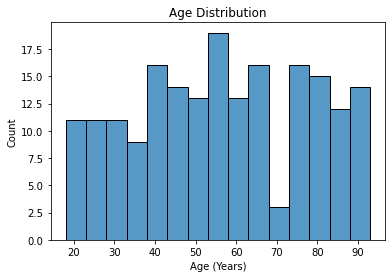

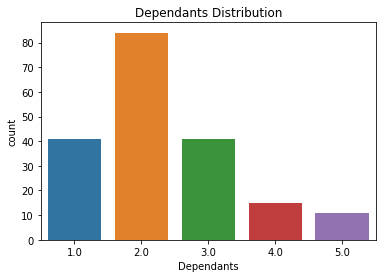

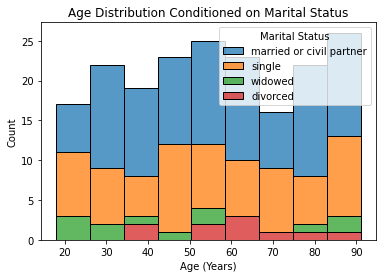

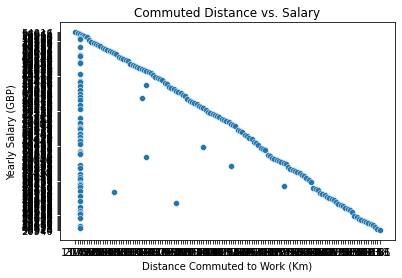

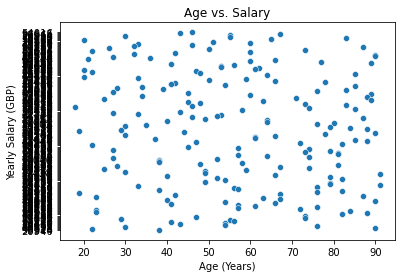

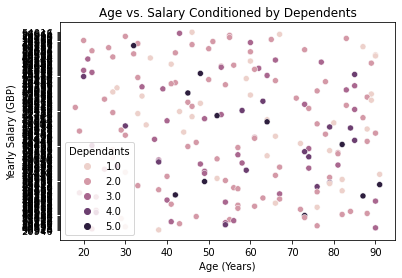

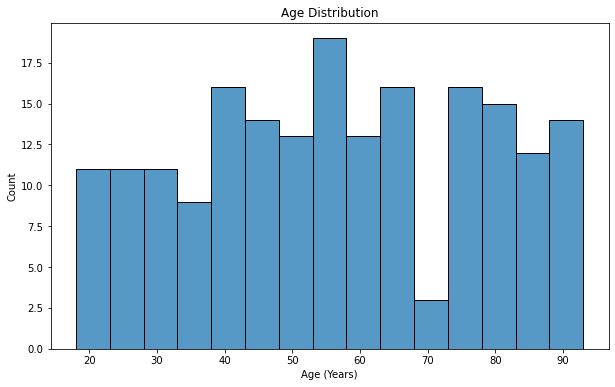

In [10]:
# Convert modified_dataset to a Pandas DataFrame
df_modified = pd.DataFrame(modified_dataset)

# Calculate Mean Salary and Median Age
mean_salary = df_modified['Yearly Salary (GBP)'].mean()
median_age = df_modified['Age (Years)'].median()


#1. Calculate Mean Salary and Median Age
#mean_salary = modified_dataset['Yearly Salary (GBP)'].mean()
#median_age = modified_dataset['Age (Years)'].median()

print(f"Mean Salary: {mean_salary}")
print(f"Median Age: {median_age}")

# 2. Univariate plots
# a. Age with bins for a bin_width of 5
df_modified['Age (Years)'] = pd.to_numeric(df_modified['Age (Years)'], errors='coerce')  # Convert to numeric, handle errors
sns.histplot(data=df_modified, x='Age (Years)', bins=range(df_modified['Age (Years)'].min(), df_modified['Age (Years)'].max() + 6, 5))
plt.title('Age Distribution')
plt.show()


# b. Dependents (fixing errors)
df_modified['Dependants'] = pd.to_numeric(df_modified['Dependants'], errors='coerce')  # Fixing errors
sns.countplot(data=df_modified, x='Dependants')
plt.title('Dependants Distribution')
plt.show()

# c. Age conditioned on Marital Status
sns.histplot(data=df_modified, x='Age (Years)', hue='Marital Status', multiple='stack')
plt.title('Age Distribution Conditioned on Marital Status')
plt.show()

# 3. Multivariate plots
# a. Commuted distance against salary
sns.scatterplot(data=df_modified, x='Distance Commuted to Work (Km)', y='Yearly Salary (GBP)')
plt.title('Commuted Distance vs. Salary')
plt.show()

# b. Age against Salary
sns.scatterplot(data=df_modified, x='Age (Years)', y='Yearly Salary (GBP)')
plt.title('Age vs. Salary')
plt.show()

# c. Age against Salary conditioned by Dependents
sns.scatterplot(data=df_modified, x='Age (Years)', y='Yearly Salary (GBP)', hue='Dependants')
plt.title('Age vs. Salary Conditioned by Dependents')
plt.show()

# 4. Save the plots
# Save each plot to a file (you can customize the filename and format)
plt.figure(figsize=(10, 6))  # Optional: Set the figure size for better visualization
sns.histplot(data=df_modified, x='Age (Years)', bins=range(df_modified['Age (Years)'].min(), df_modified['Age (Years)'].max() + 6, 5))
plt.title('Age Distribution')
plt.savefig('age_distribution_plot.png')  # Change the filename and format accordingly
plt.show()

# Repeat the saving process for other plots as needed
# ...

# Optional: Close all figures to free up resources
plt.close('all')
